## Crypto Price Chart

In [49]:
# %%capture
# !pip install yfinance
# !pip install mpld3


In [50]:
# activate tab completion so I won't shy away from descriptive vars
%config IPCompleter.use_jedi = False
# supress warnings
import warnings
warnings.filterwarnings('ignore')
# Allow for multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import the modules that should be part of core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# allow for inline printing without plt.show
%matplotlib inline
from IPython.display import display, HTML, Markdown, Video, Javascript, Image
# Allow for multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import yfinance as yf
import mpld3
mpld3.enable_notebook()

In [51]:
xmode minimal

Exception reporting mode: Minimal


In [52]:

period='max'
ticker_list = ['ETH-USD','BTC-USD','TLT', 'GLD', 'SPY']
interval = '1d'


In [53]:
#You can use this class for querying one asset. I will use this to plot just ETH by price.
eth = yf.Ticker("ETH-USD")
eth_prices_df = eth.history(period='max', interval='1d')[['Close']]
eth_prices_df.head()

,Close
Date,
2017-11-09 00:00:00+00:00,320.884003
2017-11-10 00:00:00+00:00,299.252991
2017-11-11 00:00:00+00:00,314.681000
2017-11-12 00:00:00+00:00,307.907990
2017-11-13 00:00:00+00:00,316.716003


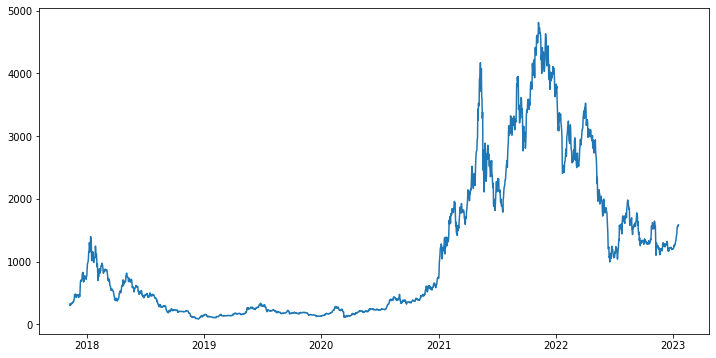

In [54]:

fig, axs = plt.subplots(figsize=(12,6));
axs.plot(eth_prices_df.index, eth_prices_df.Close);

In [55]:
#Now let's use the multiple ticker functionality of yfinance. 
#Since BTC has driven the prices and has a longer history, it is worth looking at.
crypto_df = yf.download(ticker_list, period='max')['Adj Close']
crypto_df.head()


[*********************100%***********************]  5 of 5 completed


,BTC-USD,ETH-USD,GLD,SPY,TLT
Date,,,,,
1993-01-29 05:00:00+00:00,NaN,NaN,NaN,25.218216,NaN
1993-02-01 05:00:00+00:00,NaN,NaN,NaN,25.397594,NaN
1993-02-02 05:00:00+00:00,NaN,NaN,NaN,25.451385,NaN
1993-02-03 05:00:00+00:00,NaN,NaN,NaN,25.720444,NaN
1993-02-04 05:00:00+00:00,NaN,NaN,NaN,25.828062,NaN


In [56]:
crypto_df.fillna(method='ffill', inplace=True)
crypto_returns_df = 100 * (crypto_df.loc['2018-01-01':].pct_change()+1).cumprod()
crypto_returns_df.sample(10)

,BTC-USD,ETH-USD,GLD,SPY,TLT
Date,,,,,
2019-04-03 00:00:00+00:00,36.413188,20.897002,98.649415,109.677545,101.554991
2022-01-14 05:00:00+00:00,315.582247,428.400965,137.217951,186.643588,121.357859
2022-01-31 05:00:00+00:00,281.779021,347.933754,135.940149,180.695505,121.605496
2022-07-26 00:00:00+00:00,155.520558,186.607594,129.583497,160.053128,101.232153
2020-04-29 04:00:00+00:00,64.442477,28.081377,130.796598,114.752025,140.460009
2020-09-15 04:00:00+00:00,79.056842,47.219758,148.362309,133.716348,137.418132
2018-05-27 00:00:00+00:00,53.951177,74.118256,99.644155,102.390757,95.091370
2022-11-01 04:00:00+00:00,149.996142,204.455188,124.108374,156.221232,84.185431
2021-07-10 00:00:00+00:00,245.442104,273.270974,136.845940,173.747108,124.222058


In [57]:
# fig, ax = plt.subplots((1,2), figsize=(8,8));
# ax.plot(crypto_returns_df.index, crypto_returns_df["ETH-USD"], label='ETH');
# ax.plot(crypto_returns_df.index, crypto_returns_df["BTC-USD"], label='BTC');
# ax.plot(crypto_returns_df.index, crypto_returns_df["GLD"], label='GLD');
# ax.plot(crypto_returns_df.index, crypto_returns_df["TLT"], label='TLT');
# ax.plot(crypto_returns_df.index, crypto_returns_df["SPY"], label='SPY');
# plt.legend();


In [58]:
monthly_df = crypto_df.resample('1M').ffill()
monthly_df

,BTC-USD,ETH-USD,GLD,SPY,TLT
Date,,,,,
1993-01-31 00:00:00+00:00,NaN,NaN,NaN,25.218216,NaN
1993-02-28 00:00:00+00:00,NaN,NaN,NaN,25.487259,NaN
1993-03-31 00:00:00+00:00,NaN,NaN,NaN,26.076197,NaN
1993-04-30 00:00:00+00:00,NaN,NaN,NaN,25.355352,NaN
1993-05-31 00:00:00+00:00,NaN,NaN,NaN,26.076197,NaN
...,...,...,...,...,...
2022-09-30 00:00:00+00:00,19431.789062,1327.978638,154.660004,361.131683,102.794579
2022-10-31 00:00:00+00:00,20495.773438,1572.714478,153.160004,387.241760,96.100494
2022-11-30 00:00:00+00:00,17168.566406,1295.688599,162.729996,393.423401,101.492279


In [59]:
# def fig_html_save(fig, file_name):
#     html_str = mpld3.fig_to_html(fig)
#     with open (file_name,  'w') as f:
#         f.write(html_str)
    
    

In [60]:
def plot_returns(df, ax):
    for ticker in df.columns:
        ax.plot(df.index, df[ticker], label=ticker);
        

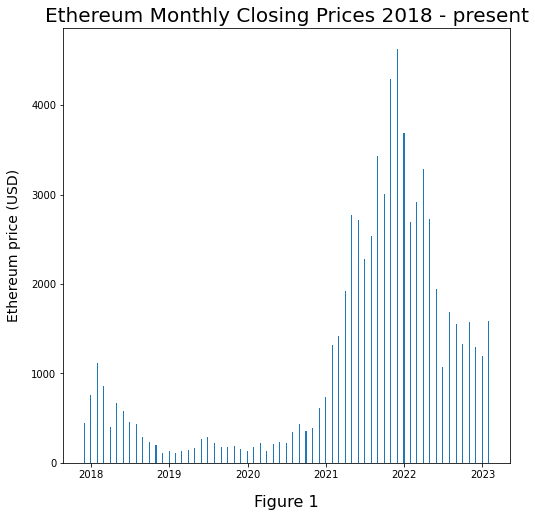

In [61]:
fig1, ax = plt.subplots(figsize=(8,8));
ax.bar(monthly_df.index, monthly_df['ETH-USD'], width=5);
ax.set_title("Ethereum Monthly Closing Prices 2018 - present", fontsize=20);
ax.set_ylabel("Ethereum price (USD)", labelpad=10, fontsize=14);
ax.set_xlabel("Figure 1", fontsize=16, labelpad=15);
#fig_html_save(fig1, 'figure1.html')
mpld3.save_html(fig1, 'figure1.html', figid='fig1')
plt.savefig('figure1.png');


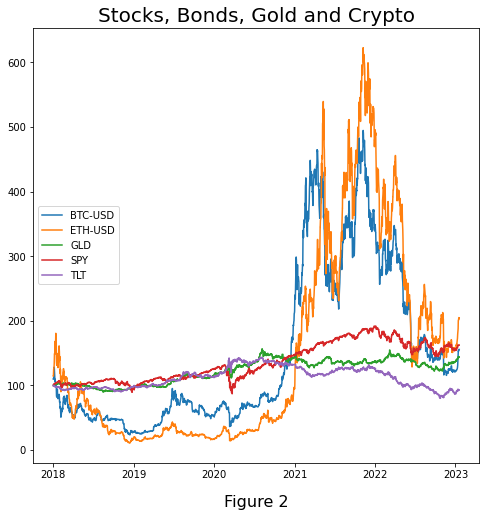

In [62]:
fig2, ax = plt.subplots(figsize=(8,8))
plot_returns(crypto_returns_df, ax)
ax.set_title("Stocks, Bonds, Gold and Crypto", fontsize=20);
ax.set_xlabel("Figure 2",fontsize=16, labelpad=15)
plt.legend(loc="center left");
mpld3.save_html(fig2, 'figure2.html', figid='fig2')
plt.savefig('figure2.png');

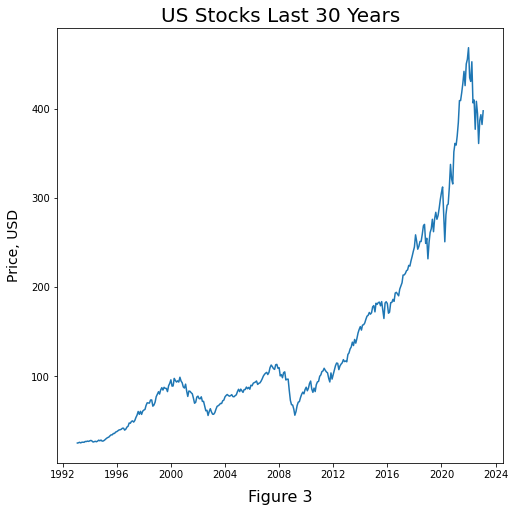

In [63]:
monthly_spy = crypto_df[["SPY"]].resample('M').ffill()
fig3, ax = plt.subplots(figsize=(8,8));
ax.plot(monthly_spy.index, monthly_spy.SPY);
ax.set_title("US Stocks Last 30 Years", fontsize=20);
ax.set_ylabel("Price, USD", fontsize=14, labelpad=10);
ax.set_xlabel("Figure 3", fontsize=16, labelpad=10);
mpld3.save_html(fig3, 'figure3.html', figid='fig3')
plt.savefig('figure3.png');


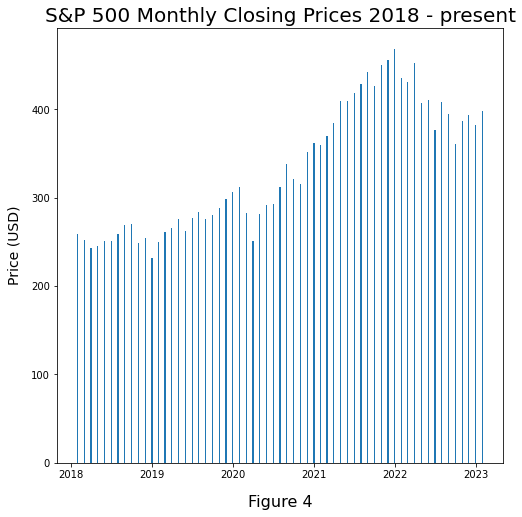

In [64]:
fig1, ax = plt.subplots(figsize=(8,8))
ax.bar(monthly_df.loc['2018-01-01':].index, monthly_df['SPY'].loc['2018-01-01':], width=5);
ax.set_title("S&P 500 Monthly Closing Prices 2018 - present", fontsize=20);
ax.set_ylabel("Price (USD)", labelpad=10, fontsize=14);
ax.set_xlabel("Figure 4", fontsize=16, labelpad=15);
fig_html_save(fig1, 'figure4.html');
plt.savefig('figure4.png');
